# Phase 4 - Feature Extraction:
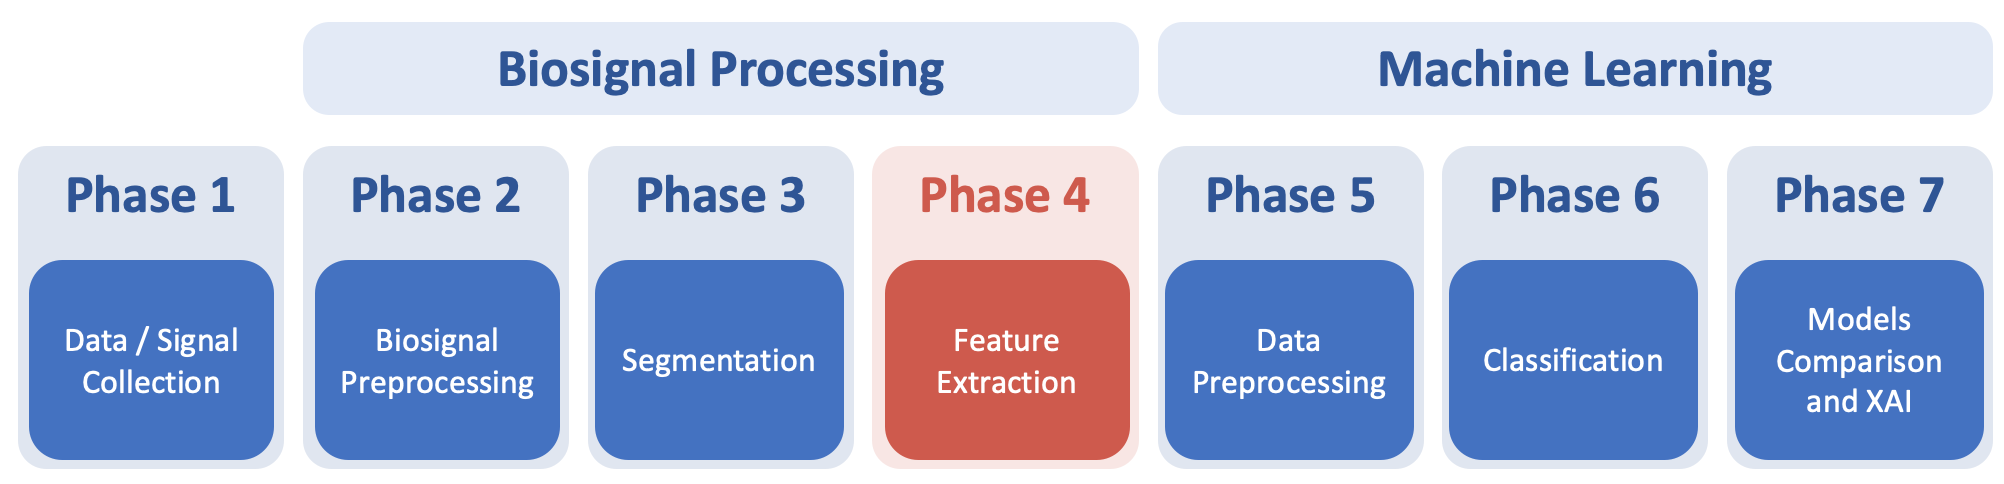

### Introduction: 
In this phase, different features are extracted from the preprocessed signals. These features are extracted from:
- Time-Domain
- Frequency Domain
- Time-Frequency Representation

All the features' types in this phase are in a form of values or images, which will direct the path of Machine Learning Model 'Phase 4'.

### Objective:
The objective of this phase is to extract all the possible features from the preprocessed signals, so that it can be used as data in the Machine Learning Model (Phase 4).

### Notes:
- The dataset used in this Notebook is imported from the saved dataset (filtered_signals_v1.csv) from local machine, which has been created in Phase 2.
- All the functions and variables, which are used in this notebook, are imported from helps.py file from the signal_processing package in the same repository.
- audio_index[0] is a normal PCG Signal.
- audio_index[51] is an abnormal PCG Signal.

In [1]:
# importing libraries:
import pandas as pd
from glob import glob

import constants as c
from feature_extraction.helpers import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the saved csv file from Phase 3:
SIGNALS = pd.read_csv('filtered_signals/filtered_signals_v1.csv')

In [3]:
# creating a variables of normal and abnormal signals with index of 0 and 51 respectively:
NORMAL_SIGNAL = SIGNALS.iloc[0, :-1]
ABNORMAL_SIGNAL = SIGNALS.iloc[51, :-1]

## 1. Time-Domain Features:


### 1.1. Descriptive Statistics:
- It returns the descriptive statistics of the signal, which includes maxmimun, minimum, mean, median and standard diviation.

In [4]:
MAX_NORMAL, MIN_NORMAL, MEAN_NORMAL, MEDIAN_NORMAL, STD_NORMAL = descriptive_statistics(NORMAL_SIGNAL)
MAX_ABNORMAL, MIN_ABNORMAL, MEAN_ABNORMAL, MEDIAN_ABNORMAL, STD_ABNORMAL = descriptive_statistics(ABNORMAL_SIGNAL)

In [5]:
# creating a DataFrame inclusing all the descriptive statistics variables:
DS_DATA = {'Normal': [MAX_NORMAL, MIN_NORMAL, MEAN_NORMAL, MEDIAN_NORMAL, STD_NORMAL],
        'Abnormal': [MAX_ABNORMAL, MIN_ABNORMAL, MEAN_ABNORMAL, MEDIAN_ABNORMAL, STD_ABNORMAL]}
DS_DATAFRAME = pd.DataFrame(DS_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DS_DATAFRAME

,Normal,Abnormal
Max,0.045646,0.222166
Min,-0.044615,-0.258714
Mean,0.000005,-0.000053
Median,0.000230,0.001330
STD,0.007445,0.044858


### 1.2. Energy and Power:
- It returns the energy and the total power of the signal.
- The power of a signal is the sum of the absolute squares of its time-domain samples divided by the signal length.
- The murmur is a higher amplitude signal and hence is expected to have a higher value of this feature.

In [6]:
ENERGY_NORMAL, POWER_NORMAL = energy_power(NORMAL_SIGNAL)
ENERGY_ABNORMAL, POWER_ABNORMAL = energy_power(ABNORMAL_SIGNAL)

In [7]:
# creating a DataFrame including the Energy and total Power of the signal:
EP_DATA = {'Normal': [ENERGY_NORMAL, POWER_NORMAL],
           'Abnormal': [ENERGY_ABNORMAL, POWER_ABNORMAL]}
EP_DATAFRAME = pd.DataFrame(EP_DATA, index=['Energy', 'Power'])
EP_DATAFRAME

,Normal,Abnormal
Energy,0.277131,10.061094
Power,0.000055,0.002012


### 1.3. Amplitude Envelope:
- It is the maximum amplitudes value among all samples in each frame, which indicates the level of loudness of the audio signal.
- It is however, sensitive to outliers.
- It  returns a list of values.

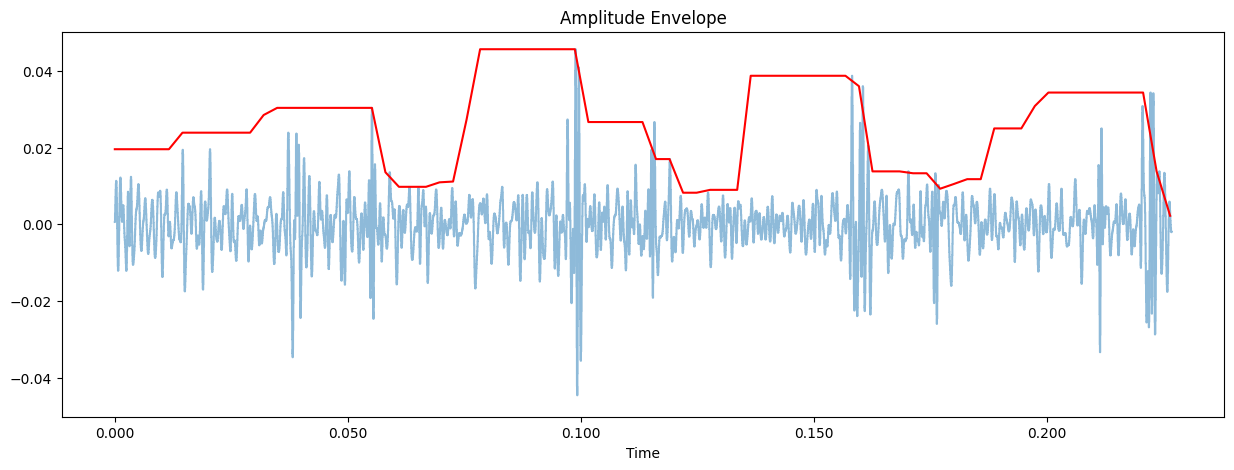

In [8]:
# Normal Signal:
amplitude_envelope(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

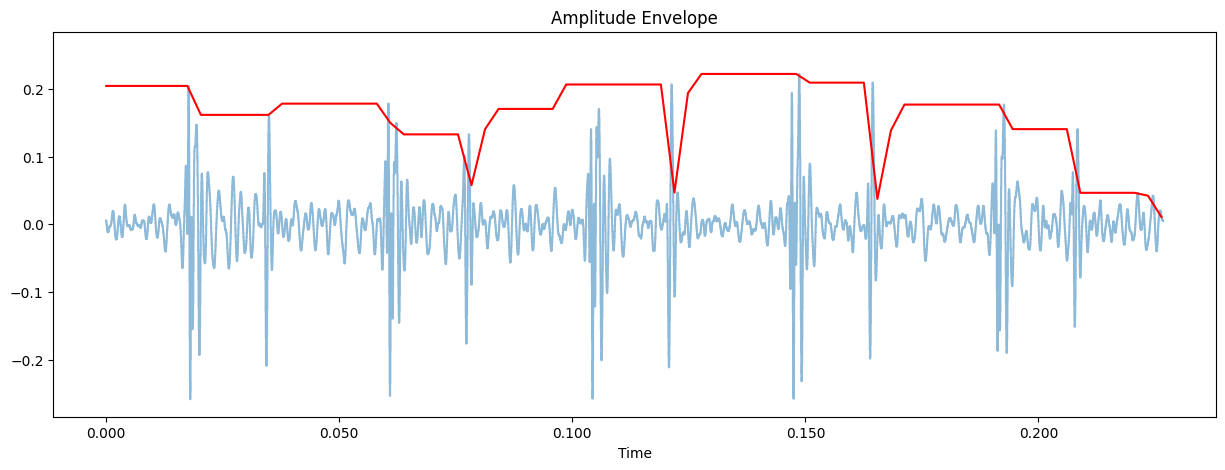

In [9]:
# Abnormal Signal:
amplitude_envelope(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [10]:
# Descriptive Statistics based on amplitude envelope:
AE_NORMAL_MAX, AE_NORMAL_MIN, AE_NORMAL_MEAN, AE_NORMAL_MEDIAN, AE_NORMAL_STD = amplitude_envelope(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)
AE_ABNORMAL_MAX, AE_ABNORMAL_MIN, AE_ABNORMAL_MEAN, AE_ABNORMAL_MEDIAN, AE_ABNORMAL_STD = amplitude_envelope(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [11]:
AE_DATA = {'Normal': [AE_NORMAL_MAX, AE_NORMAL_MIN, AE_NORMAL_MEAN, AE_NORMAL_MEDIAN, AE_NORMAL_STD],
        'Abnormal': [AE_ABNORMAL_MAX, AE_ABNORMAL_MIN, AE_ABNORMAL_MEAN, AE_ABNORMAL_MEDIAN, AE_ABNORMAL_STD]}
AE_DATAFRAME = pd.DataFrame(AE_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
AE_DATAFRAME

,Normal,Abnormal
Max,0.045646,0.222166
Min,0.002198,0.010503
Mean,0.025743,0.164404
Median,0.026651,0.176865
STD,0.011763,0.053358


### 1.4. Root Mean Square Energy:
- The Root Mean Square Energy works by detecting the mean value within a frame, which is defined at the first step. 
- It acts as an indicator of loudness, since higher the energy, louder the sound. 
- It is however less sensitive to outliers as compared to the Amplitude Envelope.
- It  returns a list of values.

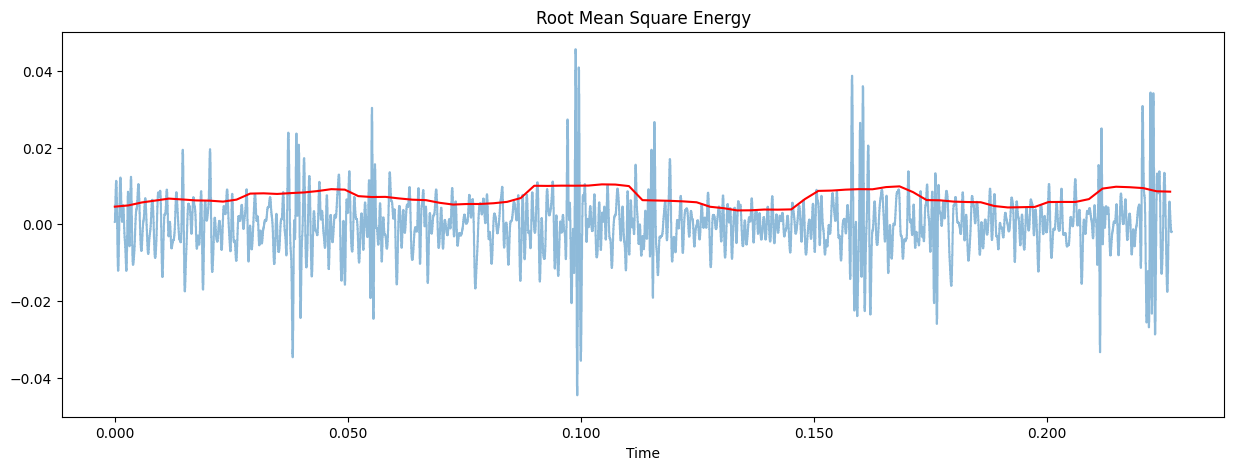

In [12]:
#Normal Signal
root_mean_square(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

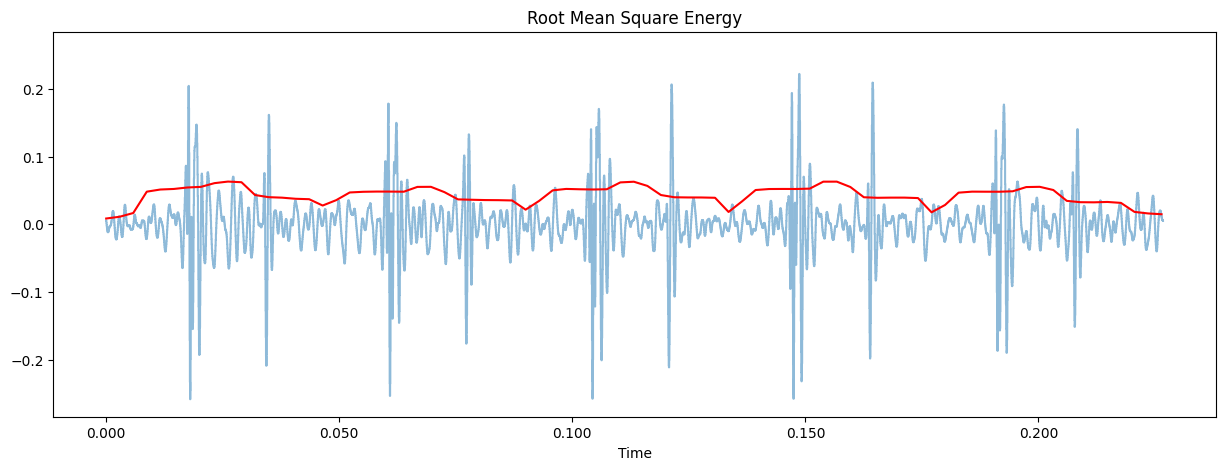

In [13]:
# Abnormal Signal:
root_mean_square(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [14]:
# Descriptive Statistics based on Root Mean Square Energy:
RM_NORMAL_MAX, RM_NORMAL_MIN, RM_NORMAL_MEAN, RM_NORMAL_MEDIAN, RM_NORMAL_STD = root_mean_square(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)
RM_ABNORMAL_MAX, RM_ABNORMAL_MIN, RM_ABNORMAL_MEAN, RM_ABNORMAL_MEDIAN, RM_ABNORMAL_STD = root_mean_square(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [15]:
RM_DATA = {'Normal': [RM_NORMAL_MAX, RM_NORMAL_MIN, RM_NORMAL_MEAN, RM_NORMAL_MEDIAN, RM_NORMAL_STD],
        'Abnormal': [RM_ABNORMAL_MAX, RM_ABNORMAL_MIN, RM_ABNORMAL_MEAN, RM_ABNORMAL_MEDIAN, RM_ABNORMAL_STD]}
RM_DATAFRAME = pd.DataFrame(RM_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
RM_DATAFRAME

,Normal,Abnormal
Max,0.010395,0.063051
Min,0.003600,0.008432
Mean,0.006984,0.042576
Median,0.006417,0.046664
STD,0.001951,0.013067


In [16]:
# Possible extra features to be extracted from Root Mean Square Energy:
RM_NORMAL = root_mean_square(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                             plot=False)
RM_ABNORMAL = root_mean_square(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                               plot=False)
RM_DATA = {'Normal_Signal': [np.mean(RM_NORMAL), np.max(RM_NORMAL), np.min(RM_NORMAL)],
        'Abnormal_Signal': [np.mean(RM_ABNORMAL), np.max(RM_ABNORMAL), np.min(RM_ABNORMAL)]}
RM_EXTRA_FEATURES = pd.DataFrame(RM_DATA, index=['Mean', 'Max', 'Min'])
RM_EXTRA_FEATURES

,Normal_Signal,Abnormal_Signal
Mean,0.005869,0.034758
Max,0.010395,0.063051
Min,0.001951,0.008432


### 1.5. Zero-Crossing Rate:
- It is the number of times a waveform crosses the horizontal time axis.
- It returns a list of values.

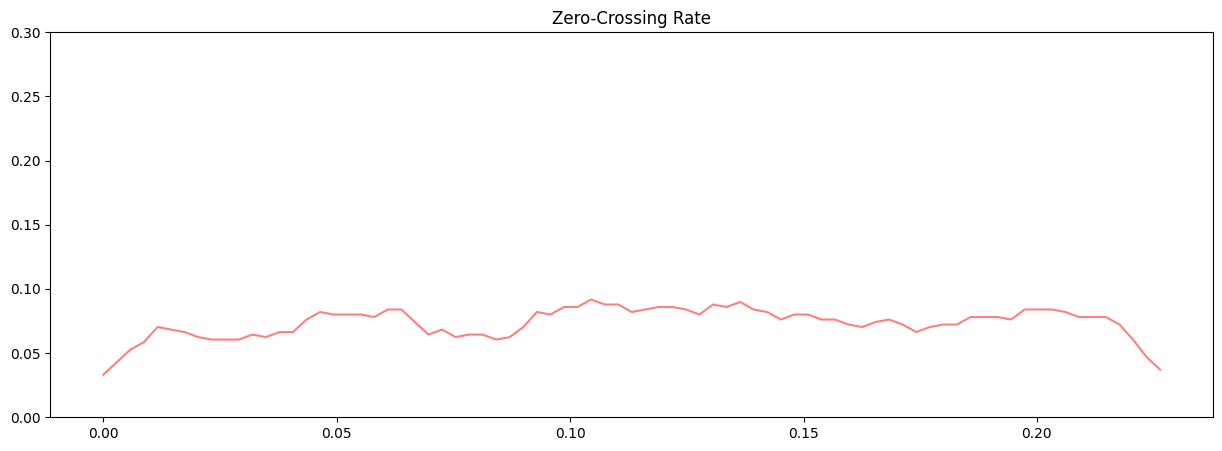

In [17]:
# Normal Signal:
zero_crossing_rate(signal=NORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   plot=True, des_stats=False)

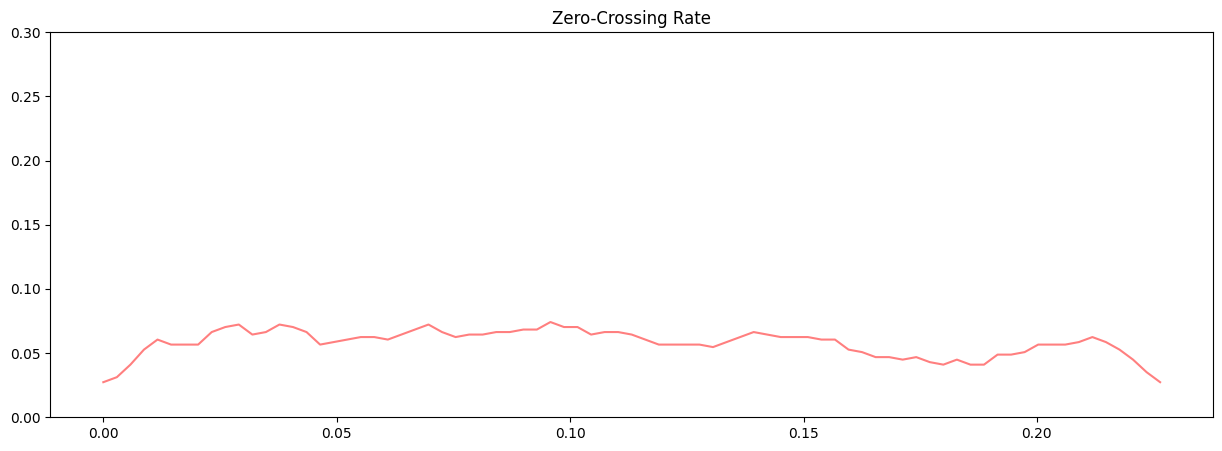

In [18]:
# Abnormal Signal:
zero_crossing_rate(signal=ABNORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                   plot=True, des_stats=False)

In [19]:
# Descriptive Statistics based on Zero-Crossing Rate:
ZCR_NORMAL_MAX, ZCR_NORMAL_MIN, ZCR_NORMAL_MEAN, ZCR_NORMAL_MEDIAN, ZCR_NORMAL_STD = zero_crossing_rate(
    signal=NORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

ZCR_ABNORMAL_MAX, ZCR_ABNORMAL_MIN, ZCR_ABNORMAL_MEAN, ZCR_ABNORMAL_MEDIAN, ZCR_ABNORMAL_STD = zero_crossing_rate(
    signal=ABNORMAL_SIGNAL, frames=True, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, plot=False, des_stats=True)

In [20]:
ZCR_DATA = {'Normal': [ZCR_NORMAL_MAX, ZCR_NORMAL_MIN, ZCR_NORMAL_MEAN, ZCR_NORMAL_MEDIAN, ZCR_NORMAL_STD],
        'Abnormal': [ZCR_ABNORMAL_MAX, ZCR_ABNORMAL_MIN, ZCR_ABNORMAL_MEAN, ZCR_ABNORMAL_MEDIAN, ZCR_ABNORMAL_STD]}
ZCR_DATAFRAME = pd.DataFrame(ZCR_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
ZCR_DATAFRAME

,Normal,Abnormal
Max,0.091797,0.074219
Min,0.033203,0.027344
Mean,0.073378,0.057753
Median,0.076172,0.060547
STD,0.011763,0.010491


In [21]:
# Zero-Crossing Rate based on the Whole Signal:
# Normal Signal:
ZCR_NORMAL = zero_crossing_rate(signal=NORMAL_SIGNAL, frames=False)
print(f'Normal: {ZCR_NORMAL}')
# Abnormal Signal:
ZCR_ABNORMAL = zero_crossing_rate(signal=ABNORMAL_SIGNAL, frames=False)
print(f'Abnormal: {ZCR_ABNORMAL}')

Normal: 0.076
Abnormal: 0.0598


## Frequency-Domain Features:
### 2.1. Peak Frequency:
- It shows the frequency at which the peak amplitude occurs.
- Since the murmurs and normal signals vary in amplitude and frequency, it could have been a potential feature.

In [22]:
# Normal Signal:
PA_NORMAL, PF_NORMAL = peak_frequency(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, plot=False)
PA_ABNORMAL, PF_ABNORMAL = peak_frequency(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, plot=False)

In [23]:
PA_DATA = {'Normal': [PA_NORMAL, PF_NORMAL],
        'Abnormal': [PA_ABNORMAL, PF_ABNORMAL]}
PA_DATAFRAME = pd.DataFrame(PA_DATA, index=['Peak Amplitude', 'Peak Frequency'])
PA_DATAFRAME

,Normal,Abnormal
Peak Amplitude,4.642384,24.857519
Peak Frequency,29.005801,27.805561


### 2.1. Band Energy Ratio:
- It provides the relation between the lower and higher frequency bands.
- It starts with converting the Signal (Time-Domain) to Spectrogram (Time-Frequency Representation).
- Identifiying the frequency threshold in the Spectrogram of the signal, in which the above and below areas of this threshold are considered as high and low frequency areas. Then, it calculates the ratio within each frame.
- It returns a list of values.

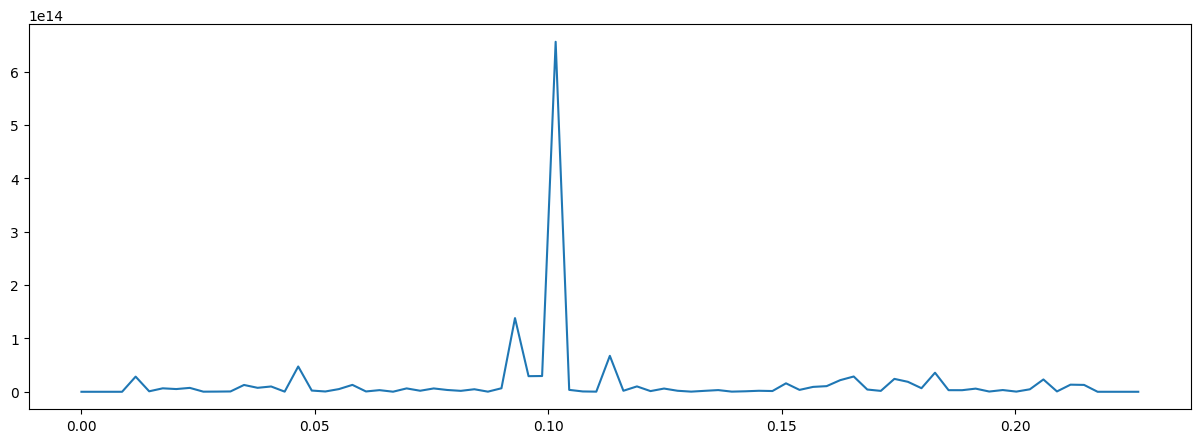

In [24]:
# Normal Signal:
band_energy_ratio(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                  split_frequency=c.SPLIT_FREQUENCY, sr=c.SAMPLING_RATE, plot=True, des_stats=False)

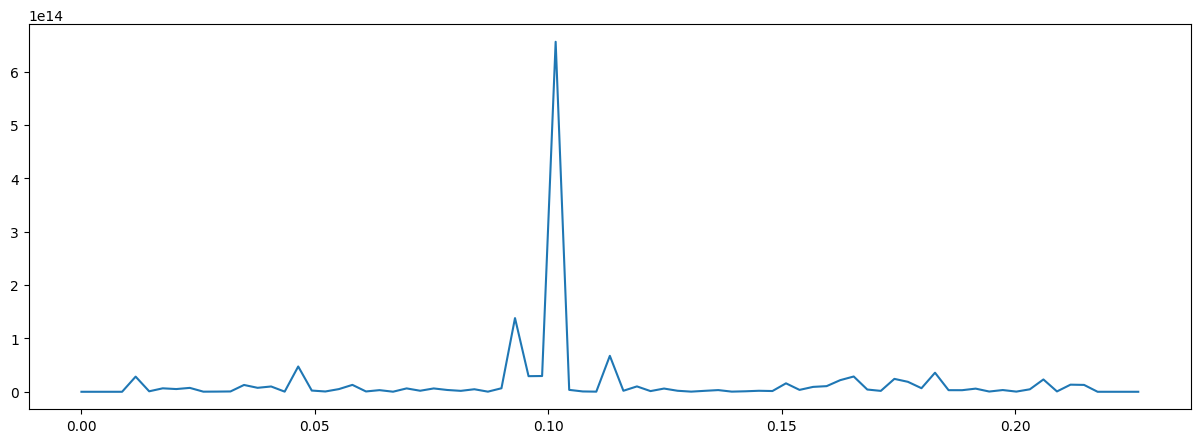

In [25]:
# Normal Signal:
band_energy_ratio(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, 
                  split_frequency=c.SPLIT_FREQUENCY, sr=c.SAMPLING_RATE, plot=True, des_stats=False)

In [26]:
# Descriptive Statistics based on Band Energy Ratio:
BER_NORMAL_MAX, BER_NORMAL_MIN, BER_NORMAL_MEAN, BER_NORMAL_MEDIAN, BER_NORMAL_STD = band_energy_ratio(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, split_frequency=c.SPLIT_FREQUENCY, 
    sr=c.SAMPLING_RATE, plot=False, des_stats=True)

BER_ABNORMAL_MAX, BER_ABNORMAL_MIN, BER_ABNORMAL_MEAN, BER_ABNORMAL_MEDIAN, BER_ABNORMAL_STD = band_energy_ratio(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, split_frequency=c.SPLIT_FREQUENCY,
    sr=c.SAMPLING_RATE, plot=False, des_stats=True)

In [27]:
BER_DATA = {'Normal': [BER_NORMAL_MAX, BER_NORMAL_MIN, BER_NORMAL_MEAN, BER_NORMAL_MEDIAN, BER_NORMAL_STD],
        'Abnormal': [BER_ABNORMAL_MAX, BER_ABNORMAL_MIN, BER_ABNORMAL_MEAN, BER_ABNORMAL_MEDIAN, BER_ABNORMAL_STD]}
BER_DATAFRAME = pd.DataFrame(BER_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
BER_DATAFRAME

,Normal,Abnormal
Max,6.561909e+14,1.313986e+15
Min,3.067123e+04,1.579126e+03
Mean,1.759542e+13,6.465038e+13
Median,3.241964e+12,5.039214e+12
STD,7.467381e+13,2.038045e+14


### 2.2. Spectral Centroid:
- It provides the frequency band where most of the energy is concentrated.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

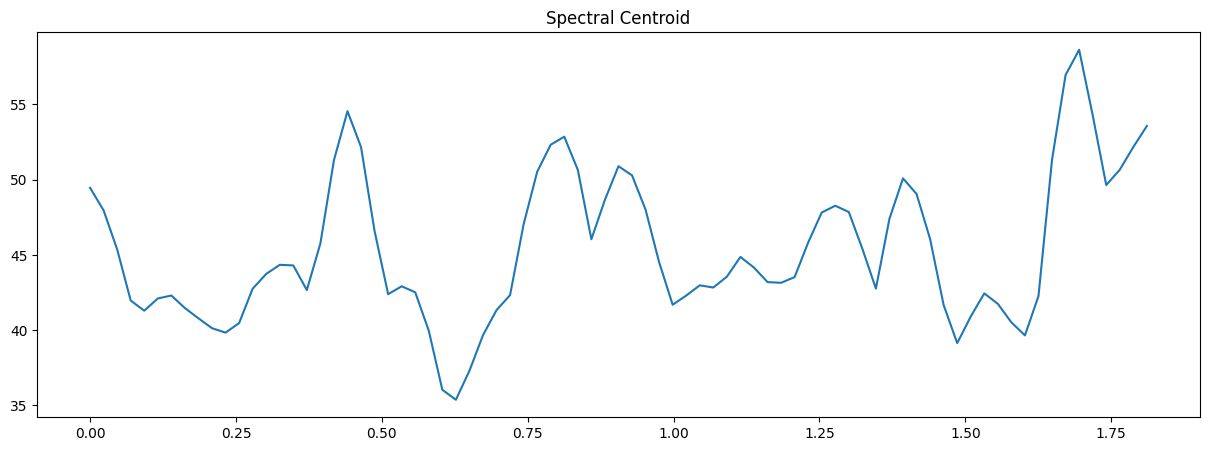

In [28]:
# Normal Signal:
spectral_centroid(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, 
                  hop_size=c.HOP_SIZE, plot=True, des_stats=False)

<function matplotlib.pyplot.show(close=None, block=None)>

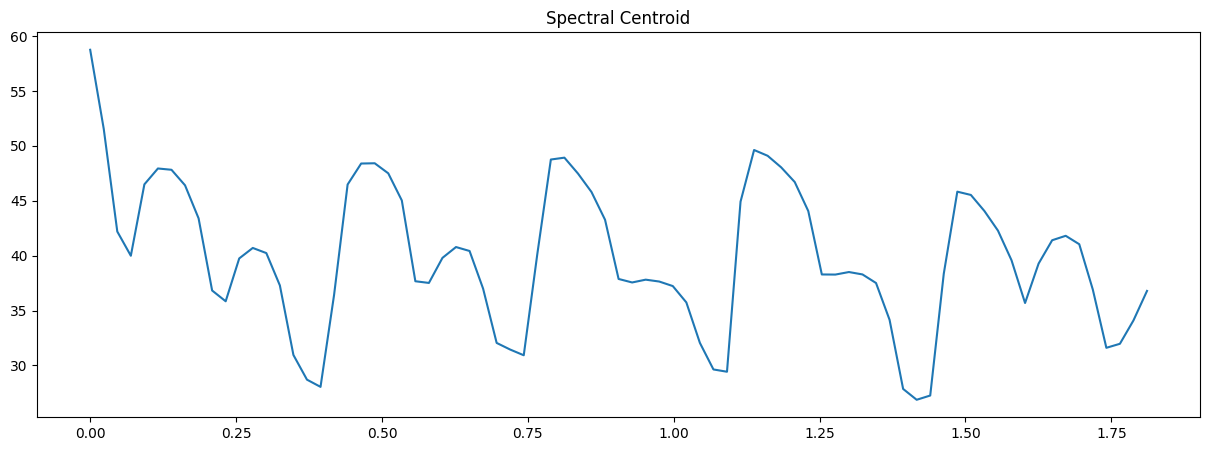

In [29]:
# Abnormal Signal:
spectral_centroid(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, 
                  hop_size=c.HOP_SIZE, plot=True, des_stats=False)

In [30]:
# Descriptive Statistics based on Spectral Centriod:
SC_NORMAL_MAX, SC_NORMAL_MIN, SC_NORMAL_MEAN, SC_NORMAL_MEDIAN, SC_NORMAL_STD = spectral_centroid(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

SC_ABNORMAL_MAX, SC_ABNORMAL_MIN, SC_ABNORMAL_MEAN, SC_ABNORMAL_MEDIAN, SC_ABNORMAL_STD = spectral_centroid(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

In [31]:
SC_DATA = {'Normal': [SC_NORMAL_MAX, SC_NORMAL_MIN, SC_NORMAL_MEAN, SC_NORMAL_MEDIAN, SC_NORMAL_STD],
        'Abnormal': [SC_ABNORMAL_MAX, SC_ABNORMAL_MIN, SC_ABNORMAL_MEAN, SC_ABNORMAL_MEDIAN, SC_ABNORMAL_STD]}
SC_DATAFRAME = pd.DataFrame(SC_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
SC_DATAFRAME

,Normal,Abnormal
Max,58.633182,58.757871
Min,35.378069,26.866480
Mean,45.335880,39.844132
Median,44.163541,39.579622
STD,4.825501,6.525309


### 2.3. Spectral Bandwidth:
- It is drived to the spectral centroid.
- It is the spectral range of interest around the centroid, that is, the variance from the spectral centroid.
- It returns a list of values.

<function matplotlib.pyplot.show(close=None, block=None)>

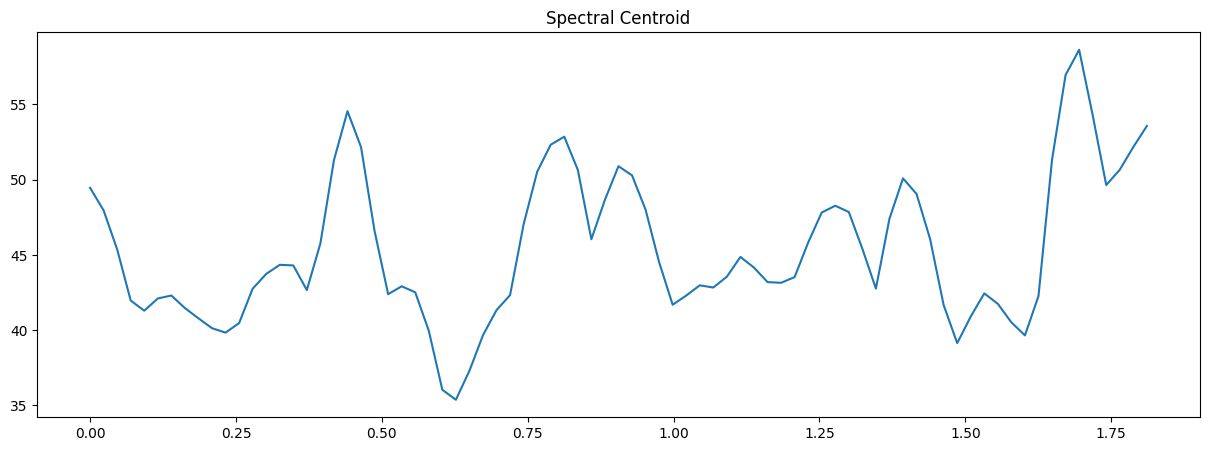

In [32]:
# Normal Signal:
spectral_centroid(signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
                  plot=True, des_stats=False)

<function matplotlib.pyplot.show(close=None, block=None)>

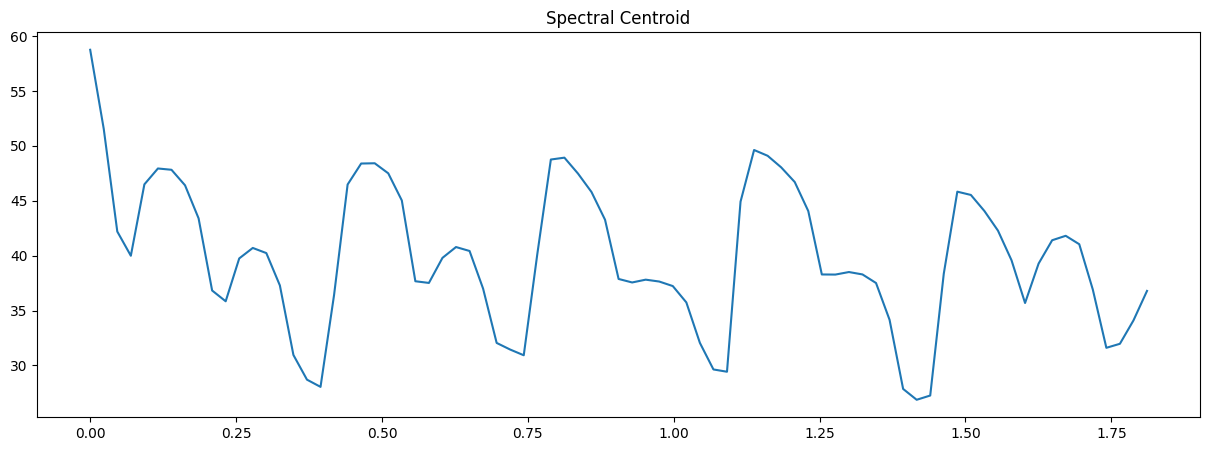

In [33]:
# Abnormal Signal:
spectral_centroid(signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
                  plot=True, des_stats=False)

In [34]:
# Descriptive Statistics based on Spectral Bandwidth:
SB_NORMAL_MAX, SB_NORMAL_MIN, SB_NORMAL_MEAN, SB_NORMAL_MEDIAN, SB_NORMAL_STD = spectral_centroid(
    signal=NORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

SB_ABNORMAL_MAX, SB_ABNORMAL_MIN, SB_ABNORMAL_MEAN, SB_ABNORMAL_MEDIAN, SB_ABNORMAL_STD = spectral_centroid(
    signal=ABNORMAL_SIGNAL, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE,sr=c.SAMPLING_RATE, 
    plot=False, des_stats=True)

In [35]:
SB_DATA = {'Normal': [SB_NORMAL_MAX, SB_NORMAL_MIN, SB_NORMAL_MEAN, SB_NORMAL_MEDIAN, SB_NORMAL_STD],
        'Abnormal': [SB_ABNORMAL_MAX, SB_ABNORMAL_MIN, SB_ABNORMAL_MEAN, SB_ABNORMAL_MEDIAN, SB_ABNORMAL_STD]}
SB_DATAFRAME = pd.DataFrame(SB_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
SB_DATAFRAME

,Normal,Abnormal
Max,58.633182,58.757871
Min,35.378069,26.866480
Mean,45.335880,39.844132
Median,44.163541,39.579622
STD,4.825501,6.525309


## 3. Time-Frequency representation Features:
### 3.1. Spectrogram:
- It is a Time-Frequency Represenation of a signal.
- The Spectrogram is calculated by apply the Short Time Fourier Transform on a signal by applying the Fourier Transform on each frame of the signal.
- It returns an image.

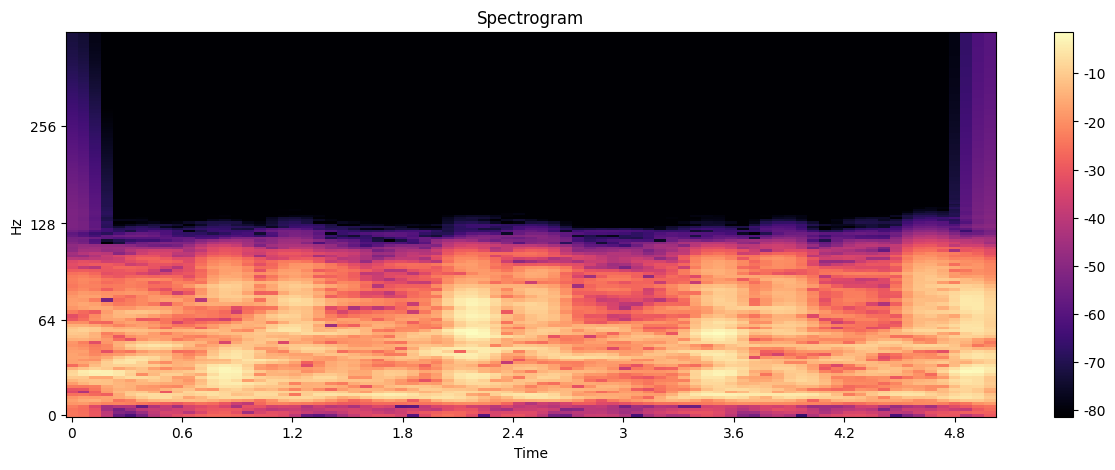

In [36]:
# Normal Signal:
spectrogram(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE)

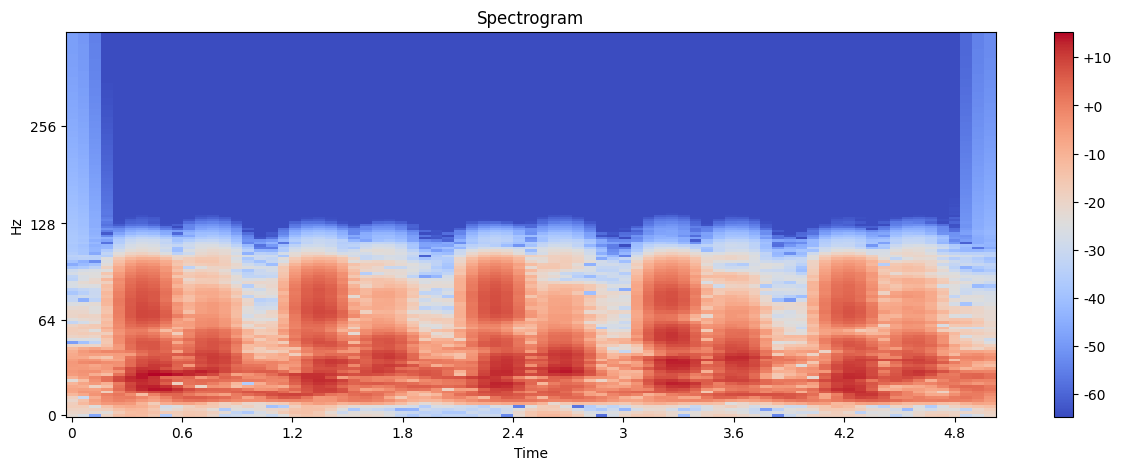

In [37]:
# Abnormal Signal:
spectrogram(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE)

### 3.2. Mel-Spectrogram:

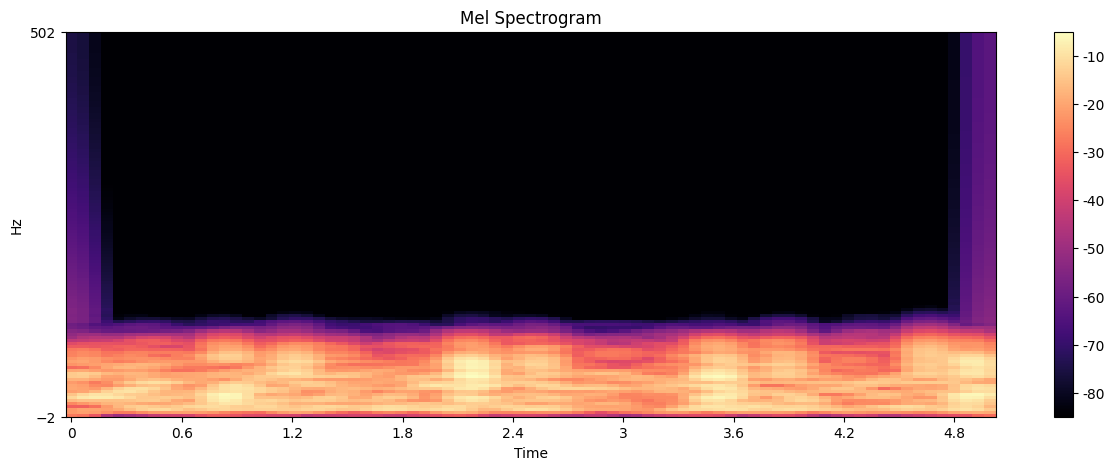

In [38]:
# Normal Signal:
mel_spectrogram(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, n_mels=128)

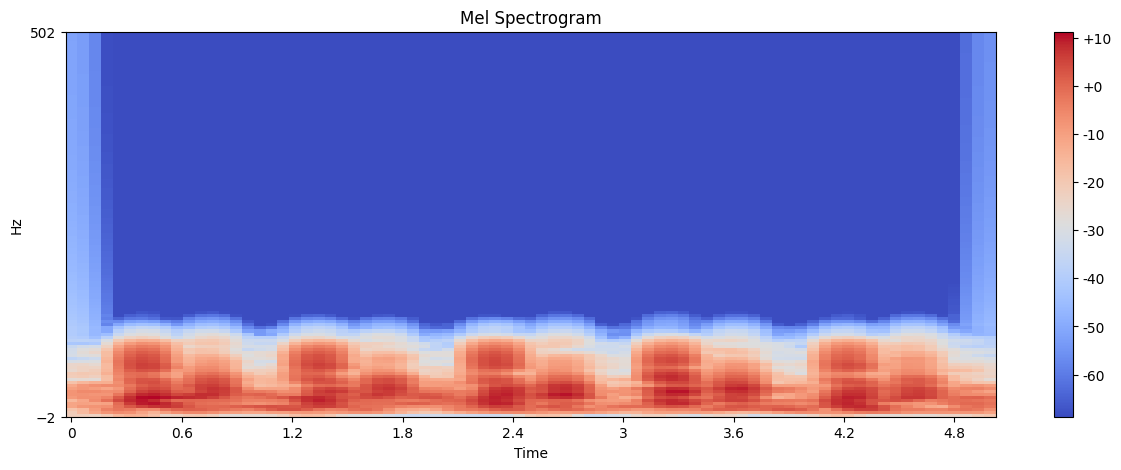

In [39]:
# Abnormal Signal:
mel_spectrogram(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, frame_size=c.FRAME_SIZE, hop_size=c.HOP_SIZE, n_mels=128)

### 3.3. Mel frequency Cepstral Coefficients (MFCCs):
### 3.3.1. MFCCs:

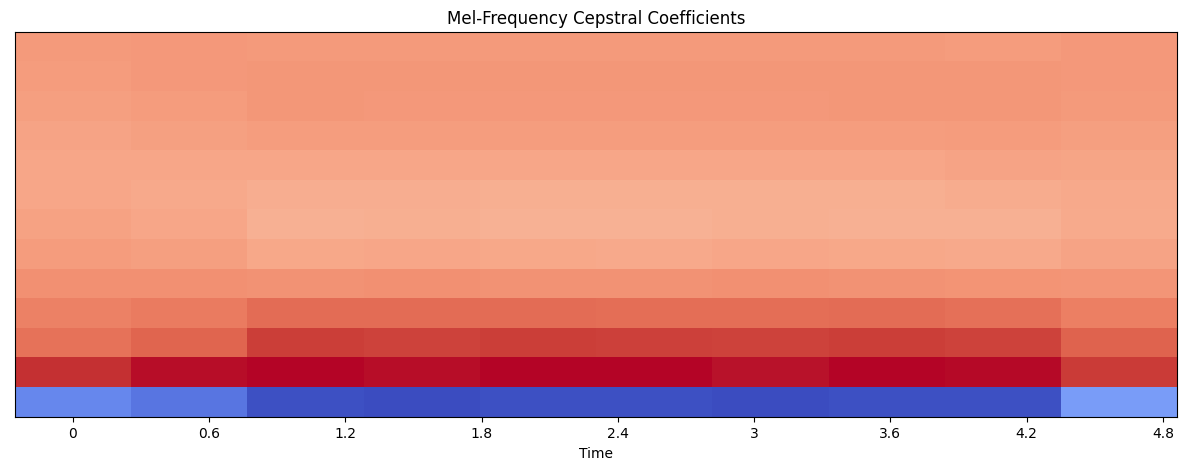

In [40]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='mfccs', plot=True, des_stats=False)

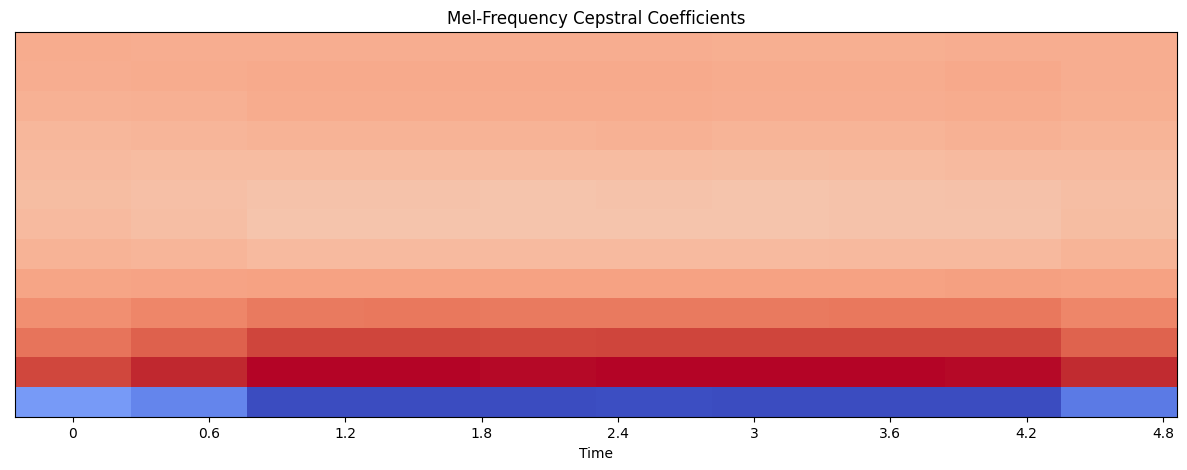

In [41]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='mfccs', plot=True, des_stats=False)

In [42]:
# Descriptive Statistics based on MFCCs:
MFCC_NORMAL_MAX, MFCC_NORMAL_MIN, MFCC_NORMAL_MEAN,\
MFCC_NORMAL_MEDIAN, MFCC_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                          sr=c.SAMPLING_RATE, 
                                                                          n_mfcc=c.N_MFCCS, 
                                                                          mfcc_type='mfccs', 
                                                                          plot=False, 
                                                                          des_stats=True)

MFCC_ABNORMAL_MAX, MFCC_ABNORMAL_MIN, MFCC_ABNORMAL_MEAN,\
MFCC_ABNORMAL_MEDIAN, MFCC_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='mfccs', 
                                                                              plot=False, 
                                                                              des_stats=True)

# creating a DataFrame for the Descriptive Statistics:
MFCC_DATA = {'Normal': [MFCC_NORMAL_MAX, MFCC_NORMAL_MIN, MFCC_NORMAL_MEAN,MFCC_NORMAL_MEDIAN, 
                        MFCC_NORMAL_STD],
        'Abnormal': [MFCC_ABNORMAL_MAX, MFCC_ABNORMAL_MIN, MFCC_ABNORMAL_MEAN, MFCC_ABNORMAL_MEDIAN,
                     MFCC_ABNORMAL_STD]}
MFCC_DATAFRAME = pd.DataFrame(MFCC_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
MFCC_DATAFRAME

,Normal,Abnormal
Max,245.479086,231.636055
Min,-704.135585,-508.149491
Mean,-19.434434,-5.290341
Median,5.605203,5.540319
STD,201.243142,155.960301


### Delta_1:

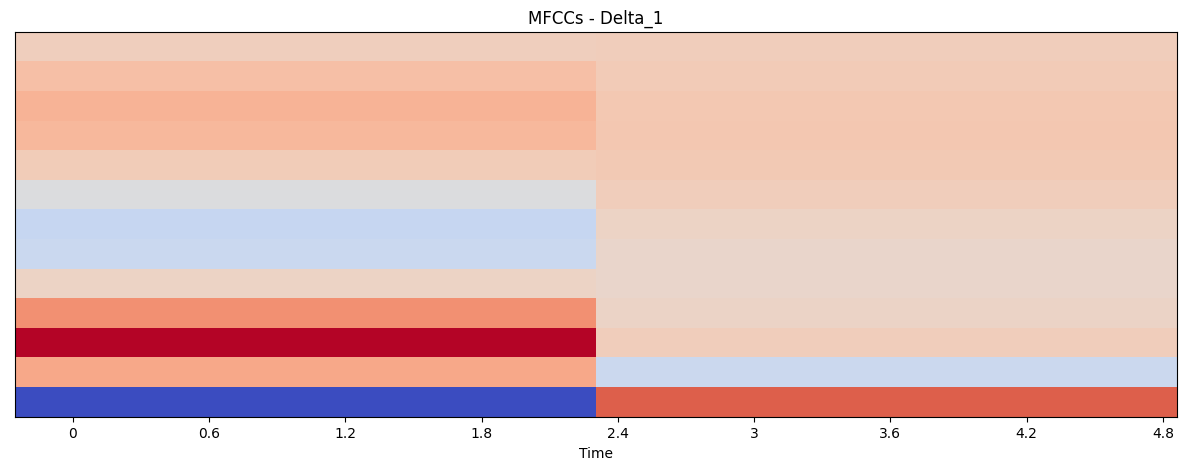

In [43]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='delta_1', plot=True, des_stats=False)

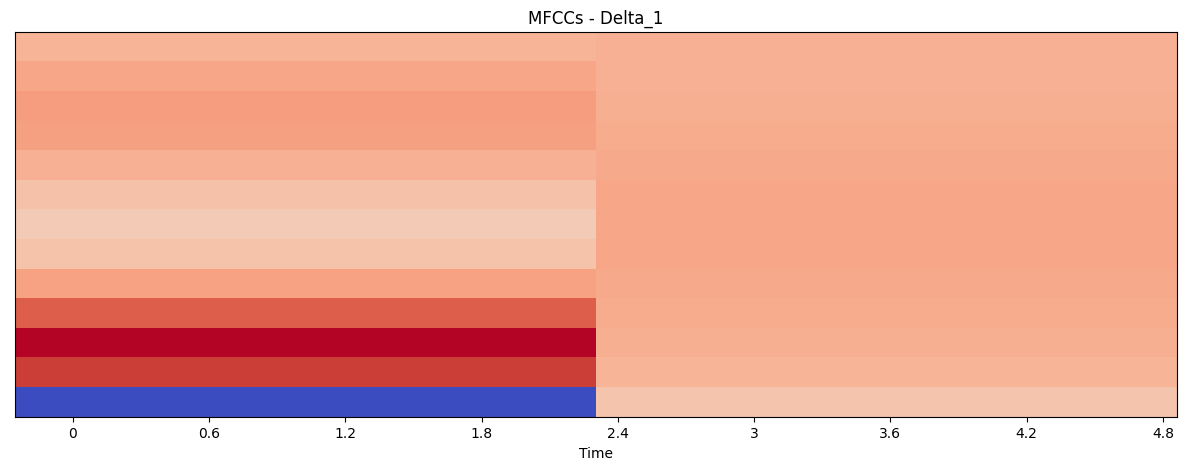

In [44]:
# Abnormal Signal:
mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='delta_1', plot=True, des_stats=False)

In [45]:
# Descriptive Statistics based on MFCCs - Delta_1:
DELTA1_NORMAL_MAX, DELTA1_NORMAL_MIN, DELTA1_NORMAL_MEAN,\
DELTA1_NORMAL_MEDIAN, DELTA1_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='delta_1', 
                                                                              plot=False, 
                                                                              des_stats=True)

DELTA1_ABNORMAL_MAX, DELTA1_ABNORMAL_MIN, DELTA1_ABNORMAL_MEAN,\
DELTA1_ABNORMAL_MEDIAN, DELTA1_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                                  sr=c.SAMPLING_RATE, 
                                                                                  n_mfcc=c.N_MFCCS, 
                                                                                  mfcc_type='delta_1', 
                                                                                  plot=False, 
                                                                                  des_stats=True)

# creating a DataFrame for the Descriptive Statistics:
DELTA1_DATA = {'Normal': [DELTA1_NORMAL_MAX, DELTA1_NORMAL_MIN, DELTA1_NORMAL_MEAN, DELTA1_NORMAL_MEDIAN, 
                        DELTA1_NORMAL_STD],
        'Abnormal': [DELTA1_ABNORMAL_MAX, DELTA1_ABNORMAL_MIN, DELTA1_ABNORMAL_MEAN, DELTA1_ABNORMAL_MEDIAN,
                     DELTA1_ABNORMAL_STD]}
DELTA1_DATAFRAME = pd.DataFrame(DELTA1_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DELTA1_DATAFRAME

,Normal,Abnormal
Max,8.745579,6.186548
Min,-12.621507,-14.367448
Mean,-0.059424,-0.125512
Median,-0.057519,0.065327
STD,3.648045,3.359326


### Delta_2:

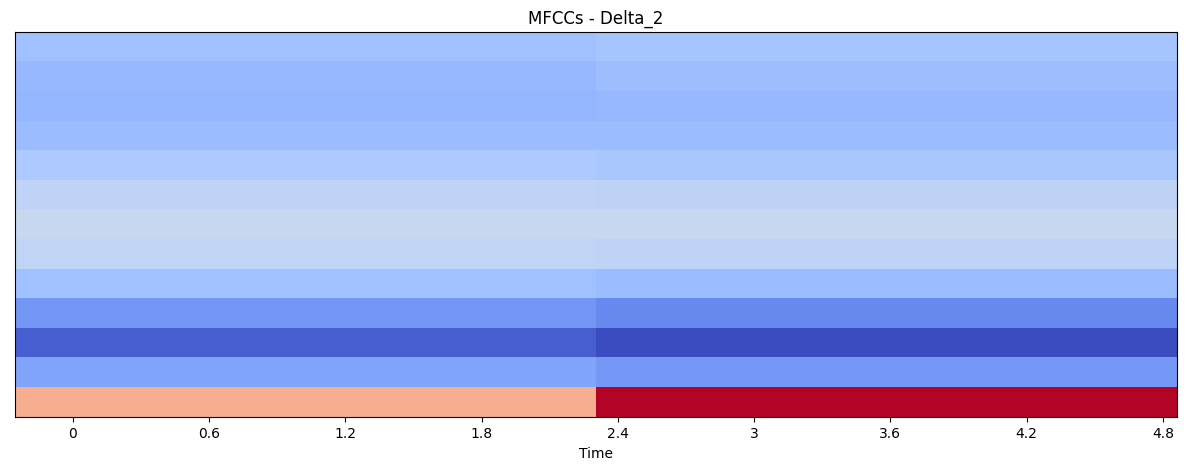

In [46]:
# Normal Signal:
mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='delta_2', plot=True, des_stats=False)

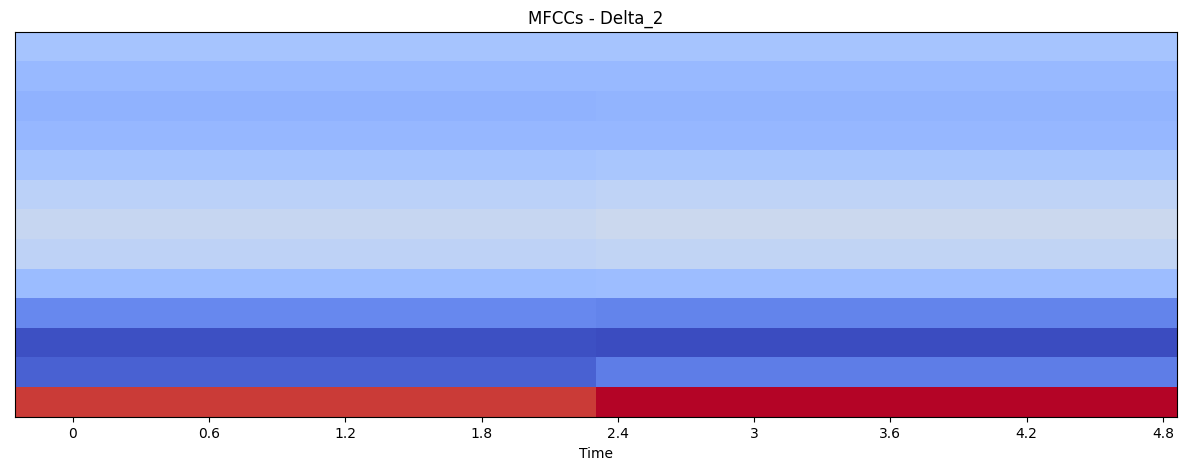

In [47]:
mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, sr=c.SAMPLING_RATE, n_mfcc=c.N_MFCCS, 
                                    mfcc_type='delta_2', plot=True, des_stats=False)

In [48]:
# Descriptive Statistics based on MFCCs - Delta_2:
DELTA2_NORMAL_MAX, DELTA2_NORMAL_MIN, DELTA2_NORMAL_MEAN,\
DELTA2_NORMAL_MEDIAN, DELTA2_NORMAL_STD = mel_frequency_cepstral_coefficients(signal=NORMAL_SIGNAL, 
                                                                              sr=c.SAMPLING_RATE, 
                                                                              n_mfcc=c.N_MFCCS, 
                                                                              mfcc_type='delta_2', 
                                                                              plot=False, 
                                                                              des_stats=True)

DELTA2_ABNORMAL_MAX, DELTA2_ABNORMAL_MIN, DELTA2_ABNORMAL_MEAN,\
DELTA2_ABNORMAL_MEDIAN, DELTA2_ABNORMAL_STD = mel_frequency_cepstral_coefficients(signal=ABNORMAL_SIGNAL, 
                                                                                  sr=c.SAMPLING_RATE, 
                                                                                  n_mfcc=c.N_MFCCS, 
                                                                                  mfcc_type='delta_2', 
                                                                                  plot=False, 
                                                                                  des_stats=True)

# creating a DataFrame for the Descriptive Statistics:
DELTA2_DATA = {'Normal': [DELTA2_NORMAL_MAX, DELTA2_NORMAL_MIN, DELTA2_NORMAL_MEAN, DELTA2_NORMAL_MEDIAN, 
                        DELTA2_NORMAL_STD],
        'Abnormal': [DELTA2_ABNORMAL_MAX, DELTA2_ABNORMAL_MIN, DELTA2_ABNORMAL_MEAN, DELTA2_ABNORMAL_MEDIAN,
                     DELTA2_ABNORMAL_STD]}
DELTA2_DATAFRAME = pd.DataFrame(DELTA2_DATA, index=['Max', 'Min', 'Mean', 'Median', 'STD'])
DELTA2_DATAFRAME

,Normal,Abnormal
Max,16.082351,10.778312
Min,-7.368245,-4.701506
Mean,0.301436,0.261162
Median,-0.323698,-0.167011
STD,4.411581,3.446609
